# Bayesian Inference for a Gaussian
## Extended Solution for A10, Series 8
- Author: Christoph Würsch, OST
- MSE FTP_MachLe


Assume a Gaussian likelihood function of the follwing form with known variance $\sigma$.

$$
p(\mathbf{X} \mid \mu) = \prod_{n=1}^{N} p(x_n \mid \mu) = \frac{1}{(2\pi\sigma^2)^{N/2}} 
\exp \left\lbrace -\frac{1}{2\sigma^2} \sum_{n=1}^{N} \left(x_n-\mu \right)^2 \right\rbrace
$$

In this case, the posterior probability distribution will again be a Gaussian distribution $\mathcal{N}$ and has the same form as the prior. The prior is then called a *conjugate* prior to the posterior.

Again we emphasize that the likelihood function $p(\mathbf{X} \mid \mu)$ is not a probability distribution
over $\mu$ and is not normalized. We see that the likelihood function takes the form of the exponential of a quadratic
form in $\mu$. Thus if we choose a prior $p(\mu)$ given by a Gaussian, it will be a *conjugate* distribution for this likelihood function because the corresponding posterior will be a product of two exponentials of quadratic functions of $\mu$ and hence will also be Gaussian $\mathcal{N}$. We therefore take our prior distribution to be

$$
p(\mu) = \mathcal{N} \left(\mu \mid \mu_0, \sigma_0^2 \right)
$$ 

And the posterior distribution is given by:

$$
p(\mu \mid \mathbf{X}) \propto p(\mathbf{X} \mid \mu) \cdot p(\mu)
$$

We consider only the terms in the exponentials and neglect the normalization factor. In this case, we have:

$$
	\exp \left \lbrace -\frac{1}{2 \sigma^2} \sum_{n=1}^{N} (x_n-\mu)^2 \right \rbrace \cdot
	\exp \left \lbrace -\frac{1}{2 \sigma_0^2} (\mu-\mu_0)^2 \right \rbrace
$$

Now, we only look at the quadratic term $Q$. The posterior probability distribution is a function of $\mu$. So we are interested only in the linear and quadratic terms in $\mu$.

\begin{aligned}
Q =& \left \lbrace -\frac{1}{2\sigma^2} \sum_{n=1}^{N} (x_n-\mu)^2  -\frac{1}{2 \sigma_0^2} (\mu-\mu_0)^2 \right \rbrace \\   
  &= \left \lbrace -\frac{1}{2 \sigma^2} \sum_{n=1}^{N} (x_n^2-2 x_n \mu + \mu^2)  
	-\frac{1}{2 \sigma_0^2} (\mu^2-2 \mu \mu_0 +\mu_0^2 ) \right \rbrace \\
 &= \left \lbrace -\frac{1}{2 \sigma^2} \left( \sum_{n=1}^{N} x_n^2 -2 \mu \sum_{n=1}^{N} x_n + N \mu^2 \right)   
	-\frac{1}{2 \sigma_0^2} (\mu^2-2 \mu \mu_0 +\mu_0^2 ) \right \rbrace \\
 &=\left \lbrace -\mu^2 \left( \frac{1}{2\sigma_0^2} + \frac{N}{2\sigma^2} \right) + 2\mu \left( \frac{\sum_{n=1}^{N} x_n}{2\sigma^2} + \frac{\mu_0}{2\sigma_0^2}\right) + \dots \right \rbrace 
 -\frac{1}{2} \left \lbrace \left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right)
	\left[ \mu - \frac{\frac{\sum_n x_n}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} \right]^2+\dots \right \rbrace 
\end{aligned}


The term in front of the square bracket is the inverse variance:
\begin{equation}
	\frac{1}{\sigma_N^2}    =\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}
\end{equation}
	
The shift term in the quare bracket is the mean $\mu_N$:
	
\begin{aligned}
	\mu_N&=\frac{ \frac{\sum_n x_n}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}} 
	      {\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}}\\
	&= \frac{\sigma_0^2 \sum_n x_n + \sigma_0^2\mu_0}{\sigma^2+N\sigma_0^2}\\
	&= \frac{\sigma^2}{\sigma^2+N\sigma_0^2} \cdot \mu_0 +
	   \frac{N \sigma_0^2}{\sigma^2+N\sigma_0^2} \cdot \frac{1}{N} \sum_n x_n\\
	&= \frac{\sigma^2}{\sigma^2+N\sigma_0^2} \cdot \mu_0 +
	\frac{N \sigma_0^2}{\sigma^2+N\sigma_0^2} \cdot \mu_{\mathrm{ML}}
\end{aligned}

It is worth spending a moment studying the form of the posterior mean and variance. 
	Using simple manipulation involving completing the square in the exponent, you could show that the
	posterior distribution is given by:

\begin{equation}\label{PosteriorA}
p(\mu \mid \mathbf{X})  = \mathcal{N}\left(\mu \mid \mu_N , \sigma_N^2 \right)
\end{equation}

\begin{equation}\label{VariancePosteriorA}
\frac{1}{\sigma_N^2}    =\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}
\end{equation}

\begin{equation}\label{MeanPosteriorA}
\mu_N = \frac{\sigma^2}{N\sigma_0^2+\sigma^2}\cdot \mu_0 
+\frac{N \sigma_0^2}{N\sigma_0^2+\sigma^2} \cdot \mu_{\mathrm{ML}}
\end{equation}

in which $\mu_{\mathrm{ML}}$ is the maximum likelihood solution for $\mu$ given by the sample mean

\begin{equation}\label{SampleMeanA}
\mu_{\mathrm{ML}} = \frac{1}{N} \sum_{n=1}^{N} x_n
\end{equation}

## Python example for a Bayesian Update
Let's do a concrete example using Python to demonstrate this. We cose a simple Gaussian prior for $\mu$ with $\mu_0=0$ and $\sigma_0^2=4$.

\begin{equation}
p(\mu) = \mathcal{N} \left(\mu \mid 0, 4 \right)
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mu0=0.0
sigma0=1.0

def NormalGauss(x,mu0=mu0,sigma0=sigma0):
    y = 1/np.sqrt(2*np.pi*sigma0)*np.exp(-1/(2*sigma0)*(x-mu0)**2)
    return y

### (i) The prior $p(\mu)$ belief about the mean of the data $x_i$

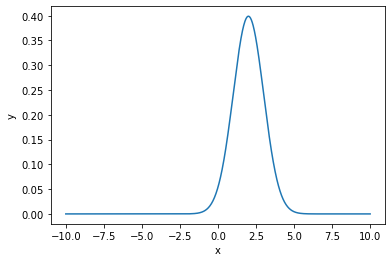

In [2]:
x=np.linspace(-10,10,1000)
prior=NormalGauss(x, mu0=2, sigma0=)
plt.figure()
plt.plot(x,prior)
plt.set_grid=True
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### (ii) The distribution of the data $x_i$


In our model we assume that the distribution of the data is also a Gaussian distribution. Therefore we can caluclate the likelihood of the data $x_i$ given the model and estimate the maximum likelihood mean $\mu_{\mathrm{ML}}$ and $\sigma_{\mathrm{ML}}^2$.

Now, lets draw $N=30$ samples from another Gaussian distribution that describes the distribution of the samples.
These will be our measurement points $x_i$. We assume that the mean and the variance of the data distribution is given by:
\begin{aligned}
\mu=2 \\
\sigma^2=1
\end{aligned}



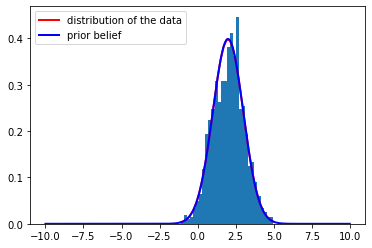

In [3]:
mu, sigma = 2, 1 # mean and standard deviation

#number of samples
N=30

s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, N, density=True)
Data=NormalGauss(bins, mu0=mu, sigma0=sigma)

plt.plot(bins, Data ,linewidth=2, color='r',label='distribution of the data')
plt.plot(x,prior,linewidth=2, color='b',label='prior belief')
plt.legend()
plt.show()


We calculate the empirical mean and variance of the data $x_i$.

In [4]:
mu_ML=np.mean(s)
var_ML=np.var(s)

print('mean: ',mu_ML)
print('variance: ',var_ML)


mean:  1.9807346670645134
variance:  0.9637135047228164


### (iii) Calculation of the posterior distribution

According to our calculations, we have for the posterior:

\begin{equation}
p(\mu \mid \mathbf{X})  = \mathcal{N}\left(\mu \mid \mu_N , \sigma_N^2 \right)
\end{equation}

\begin{equation}
\frac{1}{\sigma_N^2}    =\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}
\end{equation}

\begin{equation}
\mu_N = \frac{\sigma^2}{N\sigma_0^2+\sigma^2}\cdot \mu_0 
+\frac{N \sigma_0^2}{N\sigma_0^2+\sigma^2} \cdot \mu_{\mathrm{ML}}
\end{equation}

in which $\mu_{\mathrm{ML}}$ is the maximum likelihood solution for $\mu$ given by the sample mean

\begin{equation}
\mu_{\mathrm{ML}} = \frac{1}{N} \sum_{n=1}^{N} x_n
\end{equation}

In [5]:
sigma_N=1/(N/var_ML+1/sigma0)
print('sigma_N^2:', sigma_N)

mu_N=sigma/(N*sigma0+sigma)*mu0+N*sigma0/(N*sigma0+sigma)*mu_ML
print('mu_N:', mu_N)

sigma_N^2: 0.031123964009543738
mu_N: 1.916840000385013


First of all, we note that the __mean of the posterior distribution $\mu_N$__ given by the equation above is a compromise
between the prior mean $\mu_0$ and the maximum likelihood solution $\mu_{\mathrm{ML}}$. If the number of
observed data points $N = 0$, then this equation reduces to the prior mean as expected. For $N \rightarrow \infty$,
the posterior mean is given by the maximum likelihood solution.

Similarly, consider the result  for the __variance of the posterior distribution__.
We see that this is most naturally expressed in terms of the inverse variance,
which is called the precision. Furthermore, the precisions are additive, so that the precision
of the posterior is given by the precision of the prior plus one contribution of the data
precision from each of the observed data points. As we increase the number of observed
data points, the precision steadily increases, corresponding to a posterior distribution with
steadily decreasing variance. With no observed data points, we have the prior variance,
whereas if the number of data points $N \rightarrow \infty$, the variance $\sigma_N^2$ goes to zero and the
posterior distribution becomes infinitely peaked around the maximum likelihood solution.

We therefore see that the maximum likelihood result of a point estimate for $\mu$ given by
$\mu_{\mathrm{ML}}$ is recovered precisely from the Bayesian formalism in the limit of an infinite number of
observations. Note also that for finite $N$, if we take the limit  $\sigma_0^2 \rightarrow \infty$ which the prior has
infinite variance then the posterior mean $\mu$ reduces to the maximum likelihood result, while the posterior variance is given by $\sigma_N^2=\frac{\sigma^2}{N}$. 




Now lets change the number of *measurement points* $N$ contiunously and draw the different distributions:

sigma_N^2: 0.49076074610937054
mu_N: 0.9903673335322567


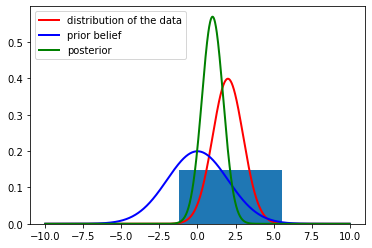

sigma_N^2: 0.32517093949435183
mu_N: 1.320489778043009


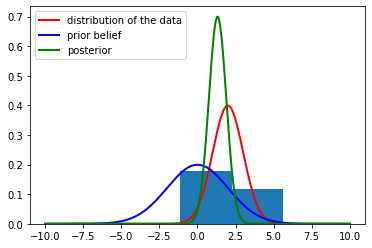

sigma_N^2: 0.1941517180243931
mu_N: 1.5845877336516108


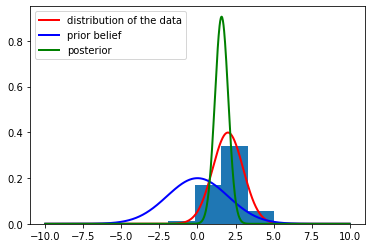

sigma_N^2: 0.10751275174235024
mu_N: 1.7606530373906786


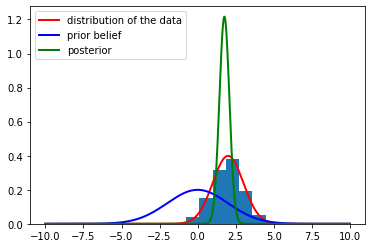

sigma_N^2: 0.074339309054595
mu_N: 1.8283704619057048


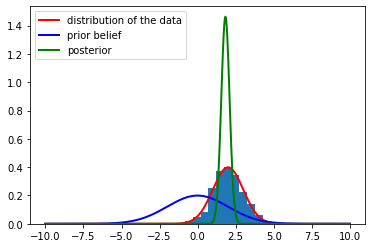

sigma_N^2: 0.05681029124044754
mu_N: 1.864220863119542


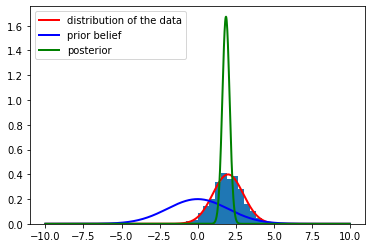

sigma_N^2: 0.045970553094312507
mu_N: 1.8864139686328698


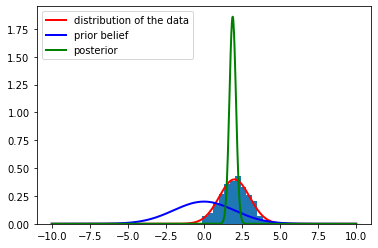

sigma_N^2: 0.011903029925456674
mu_N: 1.9562811526563095


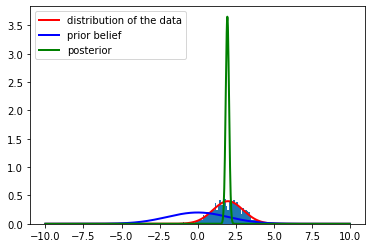

In [6]:
#number of samples
NList=[1,2,4,8,12,16,20,80]
x=np.linspace(-10,10,1000)

for N in NList:

    s = np.random.normal(mu, sigma, 1000)

    count, bins, ignored = plt.hist(s, N, density=True)
    Data=NormalGauss(x, mu0=mu, sigma0=sigma)
    sigma_N=1/(N/var_ML+1/sigma0)
    print('sigma_N^2:', sigma_N)

    mu_N=sigma/(N*sigma0+sigma)*mu0+N*sigma0/(N*sigma0+sigma)*mu_ML
    print('mu_N:', mu_N)
    
    plt.plot(x, Data ,linewidth=2, color='r',label='distribution of the data')
    plt.plot(x,prior,linewidth=2, color='b',label='prior belief')

    Posterior=NormalGauss(x, mu0=mu_N, sigma0=sigma_N)
    plt.plot(x,Posterior,linewidth=2, color='g',label='posterior')
    plt.legend()
    plt.show()
    
    

__What we observe is, that the posterior distribution gets more and more peaked around the data distribution and the estimate of the true mean $\mu_N$ gets very narrowly centered around the data mean. The more data we have, the less important our intial estimate about the prior distribution becomes.__
